#Lab 3 - Implement Multi-Layered Perceptron Network for Multi-Class Classification using Fashion MNIST Data #

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fm_dataset = tf.keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fm_dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print("Training data shape- ", train_images.shape)
print("Training data lable- ", train_labels.shape)

print("test data shape- ", test_images.shape)
print("test data lable- ", test_labels.shape)

print("Sample training image label " , train_labels[0])

Training data shape-  (60000, 28, 28)
Training data lable-  (60000,)
test data shape-  (10000, 28, 28)
test data lable-  (10000,)
Sample training image label  9


In [5]:
# define text labels
fashion_mnist_labels = ["T-shirt/top",
                        "Trouser",
                        "Pullover",
                        "Dress",
                        "Coat",
                        "Sandal",
                        "Shirt",
                        "Sneaker",
                        "Bag",
                        "Ankle boots",
                        ]

y = 2 Pullover


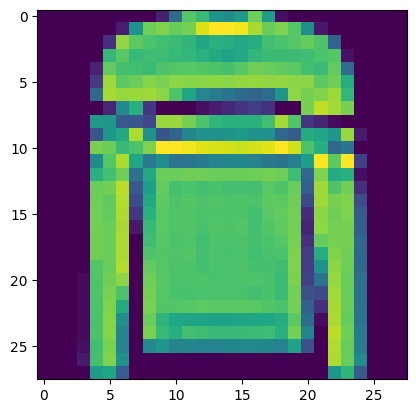

In [6]:
# Visualize some img by picking random img from 60,000 from training set
# any number between 0 to 59,999
i = 5

label = train_labels[i]
print("y = "+str(label)+" "+(fashion_mnist_labels[label]))

plt.imshow(train_images[i])

In [7]:
# Step 1 : Defining our ANN
# Total Params = 2,35,500 + 30,100 + 1010 = 2,66,610
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu')) #2,35,500 params
model.add(keras.layers.Dense(100, activation='relu')) # 30,100 params
model.add(keras.layers.Dense(10, activation='softmax')) # 1010 params

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
from tensorflow.keras.utils import plot_model

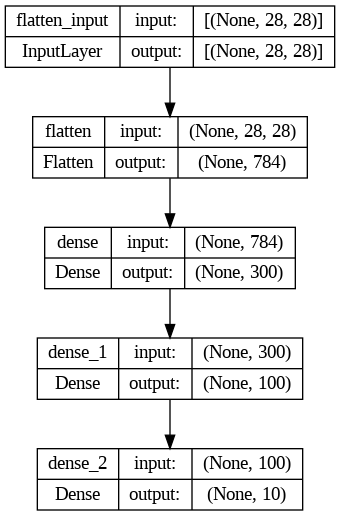

In [10]:
plot_model(model, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

In [11]:
# Step 2: Compiling the defined Neural Network Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
# Step 3: Training the Compiled NN Model Using Back-Propagation Method
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.7341 - accuracy: 0.7288
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5707 - accuracy: 0.7923
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4851 - accuracy: 0.8297
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4498 - accuracy: 0.8426
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4195 - accuracy: 0.8532
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3939 - accuracy: 0.8612
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3765 - accuracy: 0.8671
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3668 - accuracy: 0.8710
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3525 - accuracy: 0.8758
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [13]:
# Step 4 : Evaluating the trained model on Test Data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4466 - accuracy: 0.8540


In [14]:
# Print the test accuracy
print('\n', 'Test Accuracy: ', test_accuracy)


 Test Accuracy:  0.8539999723434448


In [15]:
result = np.random.choice(test_images.shape[0], size = 15, replace=False)
y_predicted = model.predict(test_images)
fashion_mnist_labels[np.argmax(y_predicted[2300])]

313/313 [==============================] - 1s 3ms/step


'Coat'

313/313 [==============================] - 1s 3ms/step


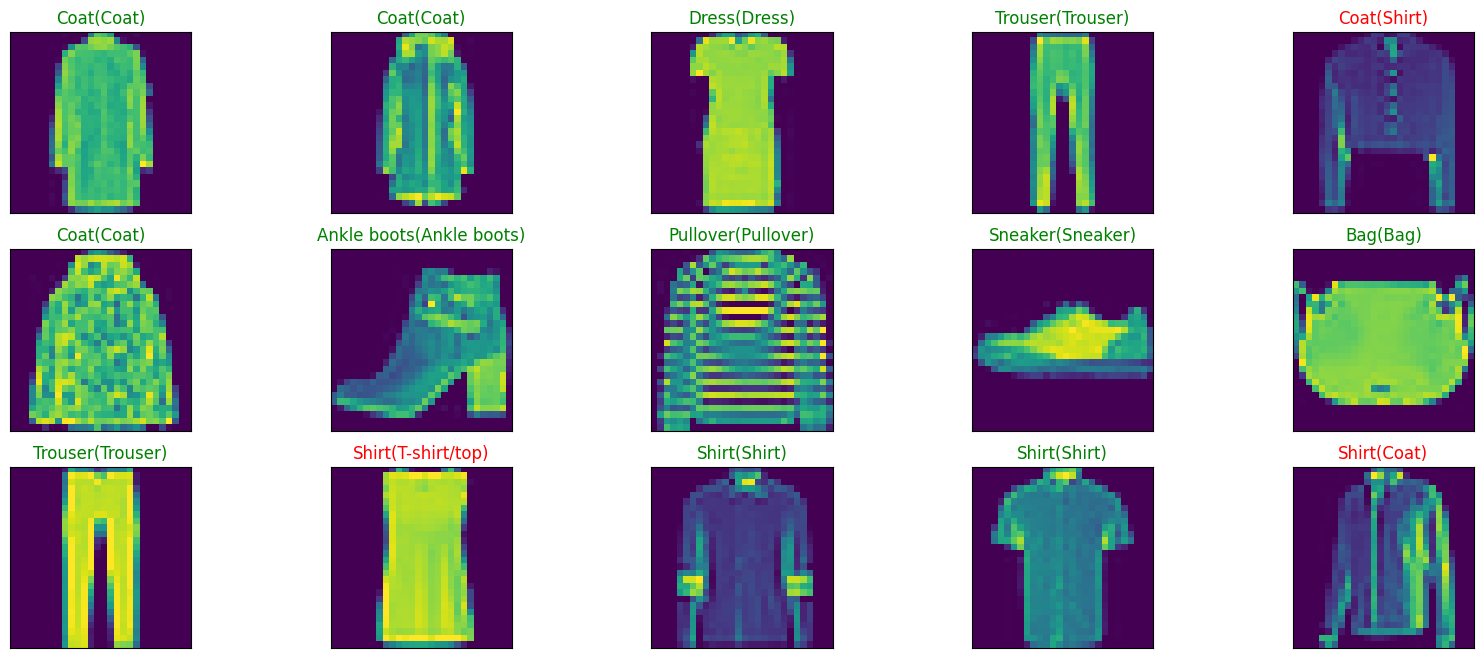

In [16]:
# Step 5 : Making Actual Predictions (Classification) on Real World Data
y_predicted = model.predict(test_images)
#Plot a random sample of 15 test images, their predicted labels and the ground truth (i.e. actual
figure = plt.figure(figsize=(20,8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size = 15, replace=False)):
  ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  # Display each image
  ax.imshow(np.squeeze(test_images[index]))
  predict_index = np.argmax(y_predicted[index])
  #true_index = np.argmax(test_labels[index])
  true_index = test_labels[index]
  # Set the title for each image
  ax.set_title("{}({})".format(fashion_mnist_labels[predict_index],
                               fashion_mnist_labels[true_index]),
                               color = "green" if predict_index == true_index else "red")